# DANE - połączenie i przygotowanie

In [1]:
import pandas as pd

df = pd.read_csv('part1/data.csv')
df = df.dropna(subset=['value'])
df = df.drop(["Unnamed: 0"], axis=1)
df.columns = ['YEAR', 'MONTH', 'DAY','City','Type','Value']

In [2]:
df_w = pd.read_csv('Data/average_daily_weather.csv')
#df = df.dropna(subset=['value'])
#df = df.drop(["Unnamed: 0"], axis=1)

In [3]:
all_data = pd.merge(df, df_w, on=['YEAR','MONTH','DAY','City'], how='inner')
all_data

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind,Humidity
0,2019,1,8,Warszawa,PM10,52.78,-2.6,3.0,8.7
1,2019,1,8,Warszawa,"PM2,5",35.56,-2.6,3.0,8.7
2,2019,1,9,Warszawa,PM10,43.53,-3.1,0.0,6.8
3,2019,1,9,Warszawa,"PM2,5",38.64,-3.1,0.0,6.8
4,2019,1,10,Warszawa,PM10,46.63,-6.8,2.5,8.5
...,...,...,...,...,...,...,...,...,...
24470,2021,2,14,Katowice,"PM2,5",33.20,-5.3,0.0,NaN
24471,2021,2,15,Katowice,"PM2,5",59.70,-7.1,1.5,8.5
24472,2021,2,16,Katowice,"PM2,5",54.90,-4.2,0.0,NaN
24473,2021,2,17,Katowice,"PM2,5",33.50,1.1,3.7,9.2


In [4]:
merged_df = all_data.drop(["Humidity"], axis=1)
merged_df = merged_df.dropna()
merged_df

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind
0,2019,1,8,Warszawa,PM10,52.78,-2.6,3.0
1,2019,1,8,Warszawa,"PM2,5",35.56,-2.6,3.0
2,2019,1,9,Warszawa,PM10,43.53,-3.1,0.0
3,2019,1,9,Warszawa,"PM2,5",38.64,-3.1,0.0
4,2019,1,10,Warszawa,PM10,46.63,-6.8,2.5
...,...,...,...,...,...,...,...,...
24470,2021,2,14,Katowice,"PM2,5",33.20,-5.3,0.0
24471,2021,2,15,Katowice,"PM2,5",59.70,-7.1,1.5
24472,2021,2,16,Katowice,"PM2,5",54.90,-4.2,0.0
24473,2021,2,17,Katowice,"PM2,5",33.50,1.1,3.7


In [5]:
PM10 = merged_df[merged_df['Type']=='PM10']

In [6]:
# Stworzenie słownika mapującego nazwy miast na liczby całkowite
city_dict = {city: i+1 for i, city in enumerate(PM10['City'].unique())}
PM10.loc[:, 'City'] = PM10['City'].replace(city_dict)
# Zamiana nazw miast na odpowiadające im liczby całkowite
PM10

C:\Users\kaami\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind
0,2019,1,8,1,PM10,52.78,-2.6,3.0
2,2019,1,9,1,PM10,43.53,-3.1,0.0
4,2019,1,10,1,PM10,46.63,-6.8,2.5
6,2019,1,11,1,PM10,53.70,-7.1,0.0
8,2019,1,12,1,PM10,25.76,0.9,2.7
...,...,...,...,...,...,...,...,...
24405,2021,12,25,5,PM10,28.00,-4.1,0.0
24407,2021,12,28,5,PM10,42.30,-4.7,2.9
24409,2021,12,29,5,PM10,45.60,-0.7,0.0
24411,2021,12,30,5,PM10,15.70,4.6,4.6


In [7]:
city_dict

{'Warszawa': 1, 'Wrocław': 2, 'Gdańsk': 3, 'Kraków': 4, 'Katowice': 5}

# RANDOM FOREST 

In [8]:
PM10_train = PM10[PM10['YEAR']<=2018]
PM10_test = PM10[PM10['YEAR']==2019]

In [9]:
PM10_test

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind
0,2019,1,8,1,PM10,52.78,-2.6,3.0
2,2019,1,9,1,PM10,43.53,-3.1,0.0
4,2019,1,10,1,PM10,46.63,-6.8,2.5
6,2019,1,11,1,PM10,53.70,-7.1,0.0
8,2019,1,12,1,PM10,25.76,0.9,2.7
...,...,...,...,...,...,...,...,...
3384,2019,12,27,5,PM10,20.00,1.7,0.0
3386,2019,12,28,5,PM10,17.10,-0.4,2.2
3388,2019,12,29,5,PM10,22.00,-1.0,0.0
3390,2019,12,30,5,PM10,50.20,0.1,3.7


In [10]:
from sklearn.ensemble import RandomForestRegressor


In [11]:

X=PM10_train[['City','Temperature','Wind']]
y=PM10_train['Value']


In [11]:
X_test=PM10_test[['City','Temperature','Wind']]
y_test=PM10_test['Value']

In [12]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [13]:
y_predicted=rf.predict(X_test)

# Sprawdzenie trafności przewidywań modelu

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_predicted)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_predicted)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_predicted)
print("R2:", r2)

MSE: 428.20170047297603
MSE sqrt: 20.69303507156396
MAE: 14.583346430924296
R2: 0.17472622026979778


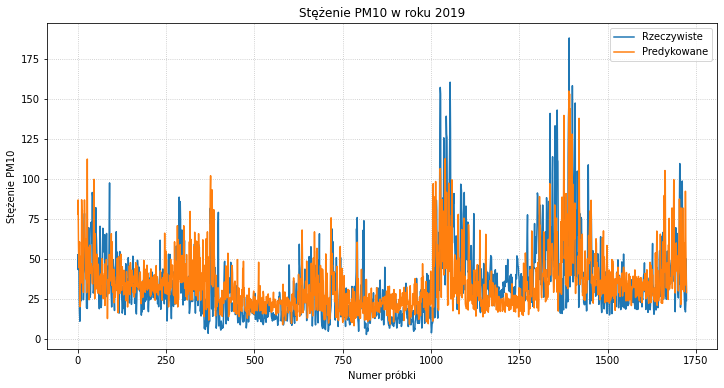

In [51]:

#Na wykresie true vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test.values, label='Rzeczywiste')
plt.plot(y_predicted, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.xlabel("Numer próbki")
plt.grid(color="silver",linestyle='dotted')
plt.title("Stężenie PM10 w roku 2019")
plt.legend()
#plt.savefig('Paula_RF_Plots/PM10_wszystkie_miasta.png')
plt.show()

In [16]:
y_test.values

array([52.78, 43.53, 46.63, ..., 22.  , 50.2 , 24.2 ])

In [17]:
len(y_predicted)

1724

In [18]:
#Mean Absolute Percentage Error (MAPE)
import numpy as np
MAPE = (1/len(y_test)) * np.sum(abs((y_test - y_predicted)/y_test)) * 100
MAPE

55.265533091198

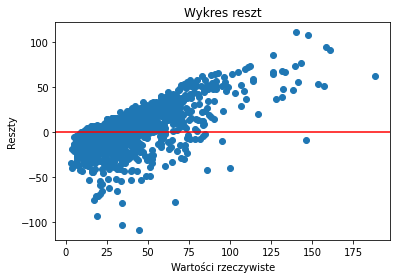

In [19]:
residuals = y_test - y_predicted

# Wygenerowanie wykresu reszt
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Wykres reszt')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Reszty')
plt.show()

# Warszawa  

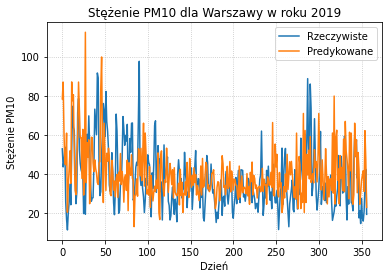

In [57]:
#Warszawa!!!!
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_War=PM10_test.loc[PM10_test['City'] == 1]

y_test_War=PM10_test_War['Value']
X_test_War=PM10_test_War[['City','Temperature','Wind']]

y_pred_War=rf.predict(X_test_War)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_War.values, label='Rzeczywiste')
plt.plot(y_pred_War, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Warszawy w roku 2019")
plt.xlabel("Dzień")
plt.grid(color="silver",linestyle='dotted')
plt.legend()
#plt.savefig('Paula_RF_Plots/PM10_Warszawa.png')
plt.show()

In [21]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_War, y_pred_War)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_War, y_pred_War)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_War, y_pred_War)
print("R2:", r2)

MSE: 333.69435730648934
MSE sqrt: 18.26730295655298
MAE: 13.72294360899749
R2: -0.4052650667934625


# Wrocław

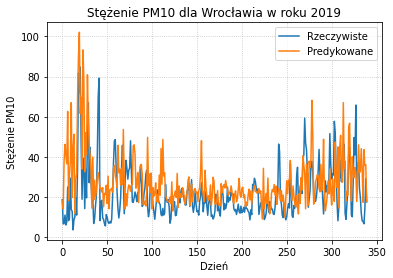

In [58]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Wro=PM10_test.loc[PM10_test['City'] == 2]

y_test_Wro=PM10_test_Wro['Value']
X_test_Wro=PM10_test_Wro[['City','Temperature','Wind']]

y_pred_Wro=rf.predict(X_test_Wro)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Wro.values, label='Rzeczywiste')
plt.plot(y_pred_Wro, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Wrocławia w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
#plt.savefig('Paula_RF_Plots/PM10_Wroclaw.png')
plt.show()

In [30]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Wro, y_pred_Wro)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Wro, y_pred_Wro)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Wro, y_pred_Wro)
print("R2:", r2)

MSE: 222.03114379107677
MSE sqrt: 14.900709506297906
MAE: 10.901114562733836
R2: -0.31114363195492567


# Gdańsk

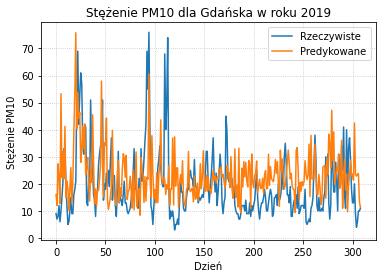

In [59]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Gd=PM10_test.loc[PM10_test['City'] == 3]

y_test_Gd=PM10_test_Gd['Value']
X_test_Gd=PM10_test_Gd[['City','Temperature','Wind']]

y_pred_Gd=rf.predict(X_test_Gd)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Gd.values, label='Rzeczywiste')
plt.plot(y_pred_Gd, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Gdańska w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
#plt.savefig('Paula_RF_Plots/PM10_Gdansk.png')
plt.show()

In [36]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Gd, y_pred_Gd)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Gd, y_pred_Gd)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Gd, y_pred_Gd)
print("R2:", r2)

MSE: 182.45608907379076
MSE sqrt: 13.507630772041068
MAE: 10.208287484512251
R2: -0.18955400939665745


# Kraków

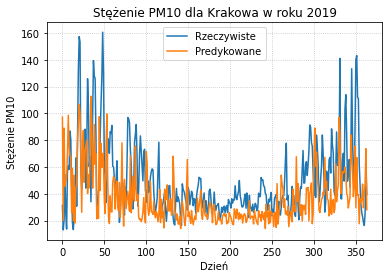

In [60]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Krak=PM10_test.loc[PM10_test['City'] == 4]

y_test_Krak=PM10_test_Krak['Value']
X_test_Krak=PM10_test_Krak[['City','Temperature','Wind']]

y_pred_Krak=rf.predict(X_test_Krak)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Krak.values, label='Rzeczywiste')
plt.plot(y_pred_Krak, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Krakowa w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
#plt.savefig('Paula_RF_Plots/PM10_Krakow.png')
plt.show()

In [38]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Krak, y_pred_Krak)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Krak, y_pred_Krak)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Krak, y_pred_Krak)
print("R2:", r2)

MSE: 778.3209858257878
MSE sqrt: 27.898404718295055
MAE: 20.97611172555794
R2: -0.07293562364176909


# Katowice

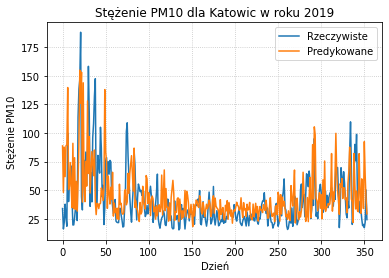

In [61]:
#Na wykresie true vs predicted
import matplotlib.pyplot as plt

PM10_test_Kat=PM10_test.loc[PM10_test['City'] == 5]

y_test_Kat=PM10_test_Kat['Value']
X_test_Kat=PM10_test_Kat[['City','Temperature','Wind']]

y_pred_Kat=rf.predict(X_test_Kat)

# wykres wartości rzeczywistych i predykowanych
plt.plot(y_test_Kat.values, label='Rzeczywiste')
plt.plot(y_pred_Kat, label='Predykowane')
plt.ylabel("Stężenie PM10")
plt.title("Stężenie PM10 dla Katowic w roku 2019")
plt.grid(color="silver",linestyle='dotted')
plt.xlabel("Dzień")
plt.legend()
#plt.savefig('Paula_RF_Plots/PM10_Katowice.png')
plt.show()

In [40]:
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test_Kat, y_pred_Kat)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test_Kat, y_pred_Kat)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test_Kat, y_pred_Kat)
print("R2:", r2)

MSE: 576.0239740215812
MSE sqrt: 24.000499453585988
MAE: 16.233203181792383
R2: 0.06434137311874755


# Feature importance based on mean decrease in impurity

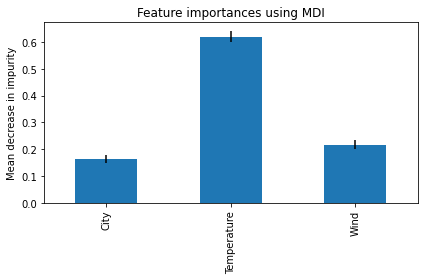

In [22]:
import pandas as pd
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
feature_names = [ i for i in X_test.columns]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [23]:
X_test.columns

Index(['City', 'Temperature', 'Wind'], dtype='object')

# Feature importance based on feature permutation

Elapsed time to compute the importances: 4.276 seconds


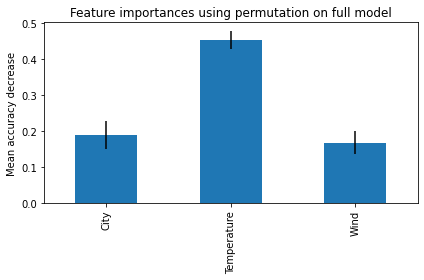

In [24]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
feature_names = [ i for i in X_test.columns]

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Adding number of month

In [12]:
all_data

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind,Humidity
0,2019,1,8,Warszawa,PM10,52.78,-2.6,3.0,8.7
1,2019,1,8,Warszawa,"PM2,5",35.56,-2.6,3.0,8.7
2,2019,1,9,Warszawa,PM10,43.53,-3.1,0.0,6.8
3,2019,1,9,Warszawa,"PM2,5",38.64,-3.1,0.0,6.8
4,2019,1,10,Warszawa,PM10,46.63,-6.8,2.5,8.5
...,...,...,...,...,...,...,...,...,...
24470,2021,2,14,Katowice,"PM2,5",33.20,-5.3,0.0,NaN
24471,2021,2,15,Katowice,"PM2,5",59.70,-7.1,1.5,8.5
24472,2021,2,16,Katowice,"PM2,5",54.90,-4.2,0.0,NaN
24473,2021,2,17,Katowice,"PM2,5",33.50,1.1,3.7,9.2


In [13]:
city_dict = {city: i+1 for i, city in enumerate(all_data['City'].unique())}
all_data.loc[:, 'City'] = all_data['City'].replace(city_dict)
all_data

,YEAR,MONTH,DAY,City,Type,Value,Temperature,Wind,Humidity
0,2019,1,8,1,PM10,52.78,-2.6,3.0,8.7
1,2019,1,8,1,"PM2,5",35.56,-2.6,3.0,8.7
2,2019,1,9,1,PM10,43.53,-3.1,0.0,6.8
3,2019,1,9,1,"PM2,5",38.64,-3.1,0.0,6.8
4,2019,1,10,1,PM10,46.63,-6.8,2.5,8.5
...,...,...,...,...,...,...,...,...,...
24470,2021,2,14,5,"PM2,5",33.20,-5.3,0.0,NaN
24471,2021,2,15,5,"PM2,5",59.70,-7.1,1.5,8.5
24472,2021,2,16,5,"PM2,5",54.90,-4.2,0.0,NaN
24473,2021,2,17,5,"PM2,5",33.50,1.1,3.7,9.2


In [18]:
X_train = all_data[(all_data.YEAR < 2019) & (all_data.Type == 'PM10')][['MONTH', 'City', 'Temperature', 'Wind', 'YEAR']]
X_test = all_data[(all_data.YEAR == 2019) & (all_data.Type == 'PM10')][['MONTH', 'City', 'Temperature', 'Wind', 'YEAR']]
y_train = all_data[(all_data.YEAR < 2019) & (all_data.Type == 'PM10')]['Value']
y_test = all_data[(all_data.YEAR == 2019) & (all_data.Type == 'PM10')]['Value']

In [19]:
X_train

,MONTH,City,Temperature,Wind,YEAR
3480,1,1,7.5,0.0,2018
3482,1,1,1.2,2.4,2018
3484,1,1,3.3,0.0,2018
3486,1,1,5.7,2.9,2018
3488,1,1,6.1,0.0,2018
...,...,...,...,...,...
17257,12,5,8.0,0.0,2015
17259,12,5,5.5,2.2,2015
17261,12,5,1.3,0.0,2015
17263,12,5,-5.1,4.0,2015


In [78]:
from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import tqdm

MC = 100
train_stats = {'MSE':[],'MSE_sqrt':[],'MAE':[],'R2':[]}
test_stats = {'MSE':[],'MSE_sqrt':[],'MAE':[],'R2':[]}

for _ in tqdm(range(MC)):
    rf = RandomForestRegressor(max_depth= 12, max_features= 'sqrt', n_estimators= 200)
    #rf = RandomForestRegressor(n_estimators= 150)
    rf.fit(X_train, y_train)
    
    y_predicted=rf.predict(X_test)
    test_stats['MSE'].append(mean_squared_error(y_test, y_predicted))
    test_stats['MSE_sqrt'].append(np.sqrt(test_stats['MSE'][-1]))
    test_stats['MAE'].append(mean_absolute_error(y_test, y_predicted))
    test_stats['R2'].append(r2_score(y_test, y_predicted))
    
    y_predicted=rf.predict(X_train)    
    train_stats['MSE'].append(mean_squared_error(y_train, y_predicted))
    train_stats['MSE_sqrt'].append(np.sqrt(train_stats['MSE'][-1]))
    train_stats['MAE'].append(mean_absolute_error(y_train, y_predicted))
    train_stats['R2'].append(r2_score(y_train, y_predicted))
   

  0%|          | 0/100 [00:00<?, ?it/s]

In [85]:
print('Train set')
print("MSE:", np.mean(train_stats['MSE']),'  ',np.std(train_stats['MSE']))
print("MSE sqrt:", np.mean(train_stats['MSE_sqrt']),'  ',np.std(train_stats['MSE_sqrt']))
print("MAE:", np.mean(train_stats['MAE']),'  ',np.std(train_stats['MAE']))
print("R2:", np.mean(train_stats['R2']),'  ',np.std(train_stats['R2']))

print()
print('Test set')
print("MSE:", np.mean(test_stats['MSE']),'  ',np.std(test_stats['MSE']))
print("MSE sqrt:", np.mean(test_stats['MSE_sqrt']),'  ',np.std(test_stats['MSE_sqrt']))
print("MAE:", np.mean(test_stats['MAE']),'  ',np.std(test_stats['MAE']))
print("R2:", np.mean(test_stats['R2']),'  ',np.std(test_stats['R2']))

Train set
MSE: 123.31410312334377    0.6003172803849476
MSE sqrt: 11.104655444308332    0.027029364347516936
MAE: 7.602415013548784    0.01590362076761127
R2: 0.8121639031451532    0.0009144230219088266

Test set
MSE: 341.2158515879311    1.5938053718581386
MSE sqrt: 18.47197851580756    0.04314278010403844
MAE: 12.976465672657232    0.028662085574040146
R2: 0.3423741773262684    0.0030717434842851025


In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_test, y_predicted)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_test, y_predicted)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_test, y_predicted)
print("R2:", r2)

MSE: 342.55838533965783
MSE sqrt: 18.50833286224499
MAE: 13.005701527282783
R2: 0.3397867100124323


In [69]:
y_predicted=rf.predict(X_train)
# błąd średniokwadratowy (mean squared error - MSE)
mse = mean_squared_error(y_train, y_predicted)
print("MSE:", mse)
print("MSE sqrt:", np.sqrt(mse))

#błąd średniowzględny (mean absolute error - MAE)
mae = mean_absolute_error(y_train, y_predicted)
print("MAE:", mae)

#współczynnik determinacji R2
r2 = r2_score(y_train, y_predicted)
print("R2:", r2)

MSE: 123.44078825339928
MSE sqrt: 11.110391003623556
MAE: 7.6113328665705104
R2: 0.8119709321892248


# Grid search

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Ustawienie siatki parametrów do przeszukania
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

# Inicjalizacja modelu Random Forest
rf = RandomForestRegressor()

# Ustawienie GridSearchCV z 5-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# dopasowanie siatki parametrów
grid_search.fit(X_train, y_train)

# Uzyskanie najlepszych parametrów
best_params = grid_search.best_params_

# Utworzenie modelu z najlepszymi parametrami
rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 max_features=best_params['max_features'])

# dopasowanie modelu z najlepszymi parametrami
rf_best.fit(X_train, y_train)

# przewidywanie dla zbioru testowego
y_pred = rf_best.predict(X_test)

# obliczenie błędu średniokwadratowego
mse = mean_squared_error(y_test, y_pred)
print('Błąd średniokwadratowy:', mse)

Błąd średniokwadratowy: 330.8322524695204


In [36]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
} 
-> 331,15 {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
} 
-> 330,23 {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
